# Market segmentation example

## Import the relevant libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.cluster import KMeans

## Load the data

In [6]:
# Load the data
data = pd.read_csv ('dataset.csv')

In [7]:
#Exploring the data
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Create a preliminary plot to see if you can spot something

Text(0, 0.5, 'Loyalty')

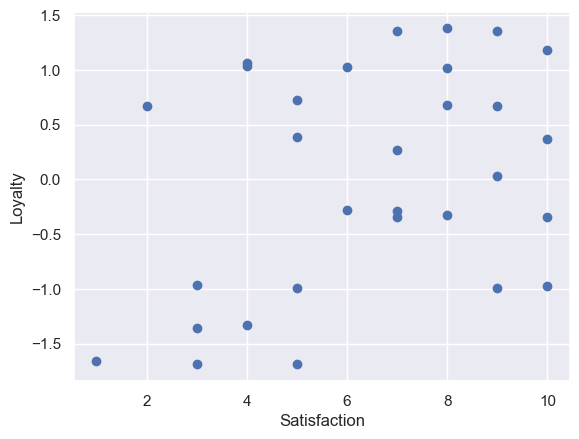

In [8]:
# creating a scatter plot of the two variables
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Naming axes 
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [9]:
# Selecting both features by creating a copy of the data variable
x = data.copy()

## Clustering

In [10]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

In [11]:
clusters = x.copy()

# Taking note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

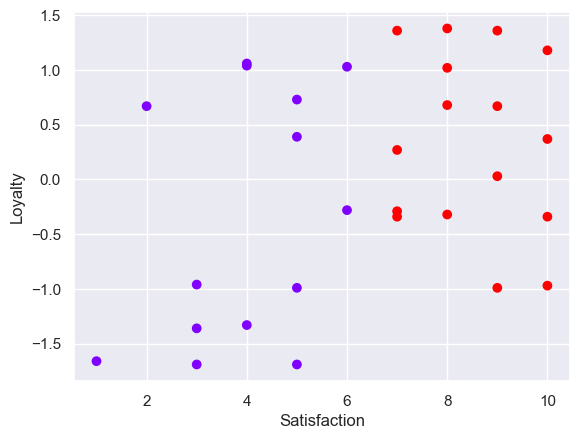

In [12]:
# Plot the data using the longitude and the latitude

plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

Let's standardize and check the new result

In [13]:
from sklearn import preprocessing

# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [14]:
# Create an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[60.0,
 29.818973034723147,
 23.263881635040697,
 10.426343601027586,
 7.792695153937188,
 6.660166530521063,
 6.243304671954077,
 4.315662464700005,
 4.54747456639648]

Text(0, 0.5, 'WCSS')

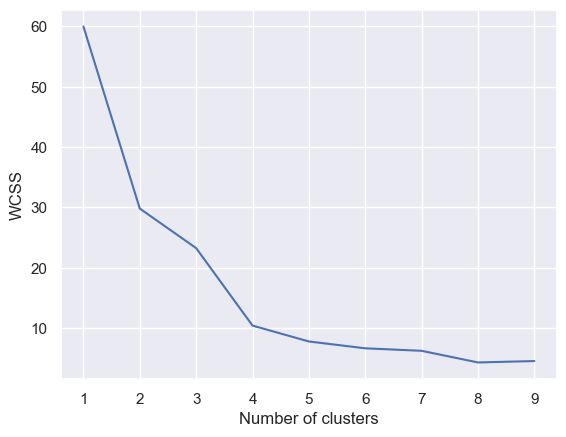

In [15]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)

# Naming axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [16]:
kmeans_new = KMeans(9)

# Fit the data
kmeans_new.fit(x_scaled)

# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [17]:
# Check if everything seems right
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,5
1,6,-0.28,6
2,5,-0.99,5
3,7,-0.29,6
4,4,1.06,3
5,1,-1.66,7
6,10,-0.97,2
7,8,-0.32,6
8,8,1.02,0
9,8,0.68,4


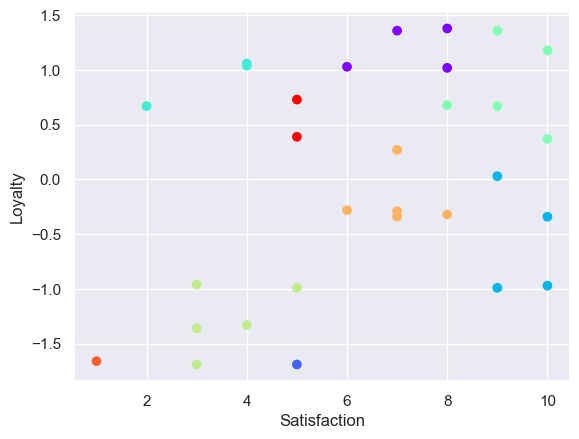

In [18]:
# Plot
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

plt.show()